<h1><b>Importing Libraries</b></h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

<h1><b>Loading the dataset</b></h1>

In [4]:
df = pd.read_json('super_store_data.json')

<h1><b>Exploratory Data Analysis and data Cleaning</b></h1>

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,Cards
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,Online
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,Online


In [6]:
df.shape

(5901, 20)

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Payment Mode     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         5901 non-null   int64  
 1   Order ID       5901 non-null   object 
 2   Order Date     5901 non-null   object 
 3   Ship Date      5901 non-null   object 
 4   Ship Mode      5901 non-null   object 
 5   Customer ID    5901 non-null   object 
 6   Customer Name  5901 non-null   object 
 7   Segment        5901 non-null   object 
 8   Country        5901 non-null   object 
 9   City           5901 non-null   object 
 10  State          5901 non-null   object 
 11  Region         5901 non-null   object 
 12  Product ID     5901 non-null   object 
 13  Category       5901 non-null   object 
 14  Sub-Category   5901 non-null   object 
 15  Product Name   5901 non-null   object 
 16  Sales          5901 non-null   float64
 17  Quantity       5901 non-null   int64  
 18  Profit  

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
df['Year'] = df['Order Date'].dt.strftime('%Y')
df['Month'] = df['Order Date'].dt.strftime('%B')

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Payment Mode', 'Year', 'Month'],
      dtype='object')

In [12]:
df[['Order Date', 'Month']]

,Order Date,Month
0,2019-01-01,January
1,2019-02-01,February
2,2019-02-01,February
3,2019-03-01,March
4,2019-03-01,March
...,...,...
5896,2020-12-30,December
5897,2020-12-30,December
5898,2020-12-30,December
5899,2020-12-30,December


<h1><br>Data Analysis and Visulizations</b></h1>

In [13]:
def convert_to_millions(number):
    million_number = number / 1000000
    return f"{million_number:.2f}M"

float_number = np.sum(df['Sales'])
string_millions = convert_to_millions(float_number)
ss = f"| Total Sales: {string_millions} |"
for i in range(len(ss)):
    print("-",end='')
print(f"\n{ss}")
for i in range(len(ss)):
    print("-",end='')
print()

----------------------
| Total Sales: 1.57M |
----------------------


In [14]:
def convert_to_thousands(number):
    thousand_number = number / 1000
    return f"{thousand_number:.0f}K"

float_number = np.sum(df['Profit'])
string_thousands = convert_to_thousands(float_number)
ss=f"| Total Profit: {string_thousands} |" 
for i in range(len(ss)):
    print("-",end='')
print(f"\n{ss}")
for i in range(len(ss)):
    print("-",end='')
print()

----------------------
| Total Profit: 175K |
----------------------


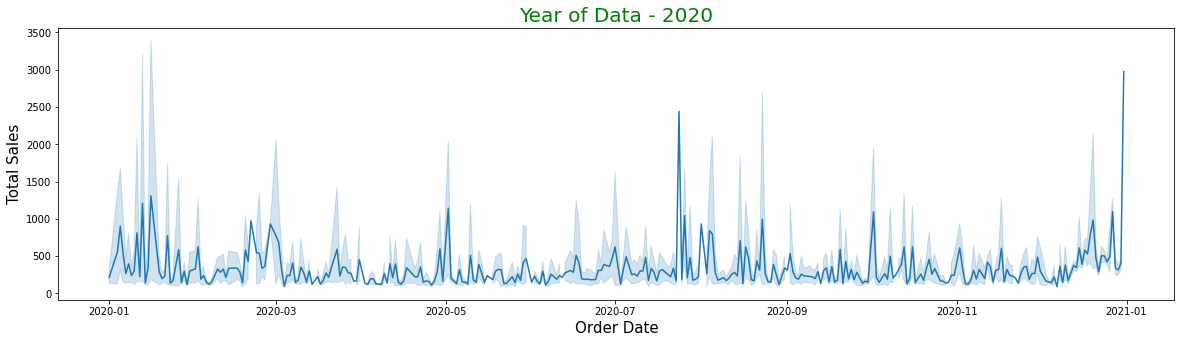

In [15]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Order Date', y='Sales', data=df[df['Year']=='2020'])
plt.title('Year of Data - 2020', fontsize=20, color='g')
plt.xlabel('Order Date', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.show()

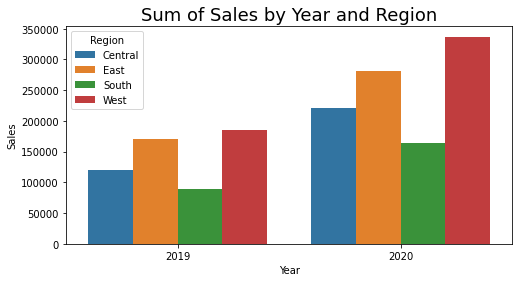

In [16]:
total_sales_month = df.groupby(['Year','Region'], as_index=False)['Sales'].sum().sort_values(by='Year', ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Sales', data=total_sales_month, hue='Region')
plt.title('Sum of Sales by Year and Region', fontsize=18)
plt.show()

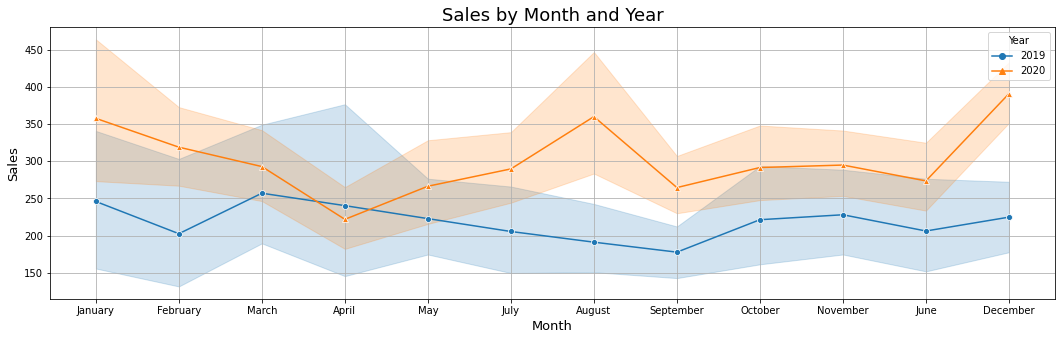

In [17]:
plt.figure(figsize=(18,5))
sns.lineplot(x='Month', y='Sales' ,data=df, hue='Year',style='Year', markers=["o","^"], dashes=False)
plt.title('Sales by Month and Year', fontsize=18)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.grid()
plt.show()

In [18]:
sort_order = ['January', 'February', 'March', 'April', 
              'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December']

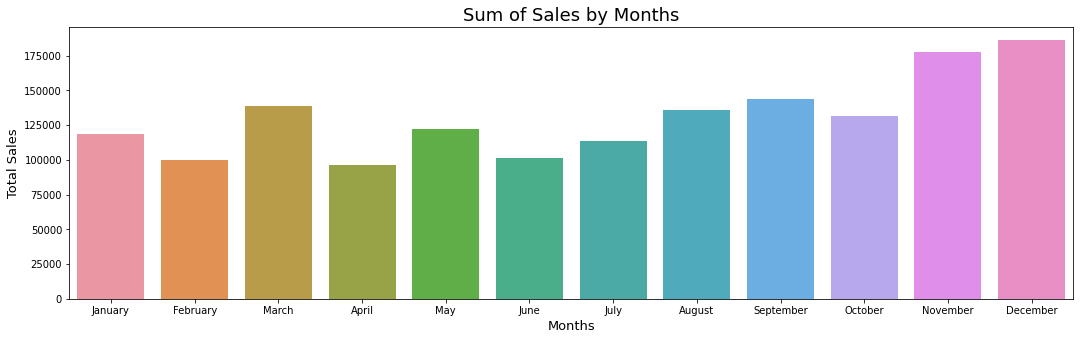

In [19]:
#total_sales_month = df.groupby('Month', as_index=False)['Sales'].sum().sort_values(by='Month', ascending=True)
total_sales_month = df.groupby('Month', as_index=False)['Sales'].sum()
total_sales_month.index = pd.CategoricalIndex(total_sales_month['Month'], categories=sort_order, ordered = True)
total_sales_month = total_sales_month.sort_index().reset_index(drop= True)
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='Sales', data=total_sales_month)
plt.title('Sum of Sales by Months', fontsize=18)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.show()

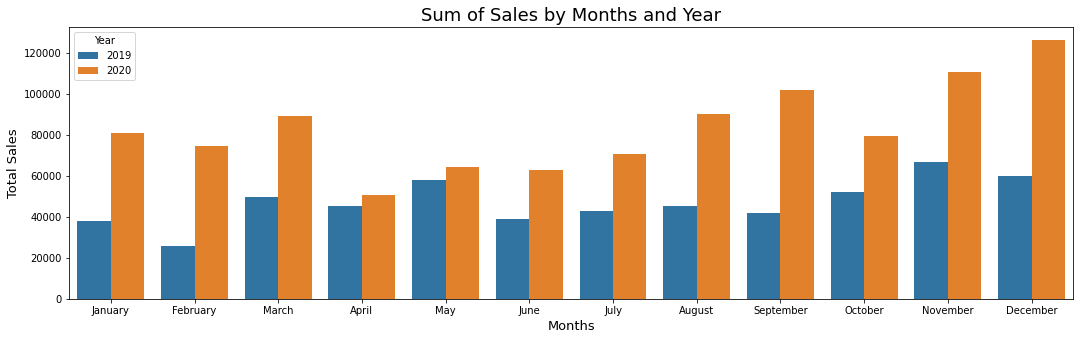

In [20]:
#total_sales_month = df.groupby(['Year','Month'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
total_sales_month = df.groupby(['Year','Month'], as_index=False)['Sales'].sum()
total_sales_month.index = pd.CategoricalIndex(total_sales_month['Month'], categories=sort_order, ordered = True)
total_sales_month = total_sales_month.sort_index().reset_index(drop= True)
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='Sales', data=total_sales_month, hue='Year')
plt.title('Sum of Sales by Months and Year', fontsize=18)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.show()

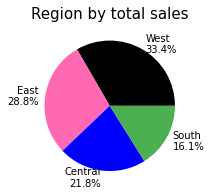

In [21]:
most_region = df.groupby('Region', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
x_sum = np.sum([i for i in most_region['Sales']])
find_per=[]
for i in range(most_region.shape[0]):
    m=most_region.iloc[i]
    a = (m['Sales']*100) / x_sum
    c = f"{m['Region']}\n{round(a, 1)}%"
    find_per.append(c)
mylabels = find_per
mycolors = ["black", "hotpink", "b", "#4CAF50"]
plt.figure(figsize = (4,3))
plt.pie(most_region['Sales'], labels=mylabels, colors=mycolors)
plt.title('Region by total sales', fontsize=15)
plt.show()

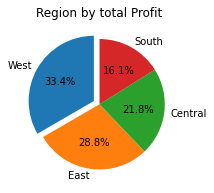

In [22]:
most_profit_region = df.groupby('Region', as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
mylabels = [i for i in most_profit_region['Region']]
myexplode = [0.1,0,0,0]
plt.figure(figsize=(4,3))
plt.pie(most_region['Sales'], labels=mylabels, startangle=90, explode=myexplode, autopct='%1.1f%%')
plt.title('Region by total Profit')
plt.show()

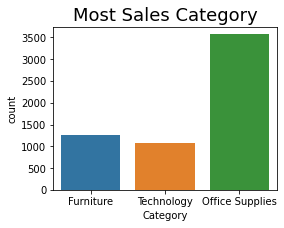

In [23]:
plt.figure(figsize=(4,3))
sns.countplot(x='Category', data=df)
plt.title('Most Sales Category',fontsize=18)
plt.show()